<font size=8>**Salary analysis for the top 6 data roles**<font>

**Importing the necessary libraries and cleaning the dataframe**

In [4]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\vbali\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Jul 24 13:39:16 2024).


**Filtering for US data job postings**

In [5]:
df_us=df[df['job_country']=='United States']

**Defining the top 6 data roles and creating a list for them**

In [6]:
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()

**Filtering the dataframe for the top 6 data roles**

In [7]:
df_US_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

**Sorting the top 6 data roles by median salary to create an order for visualization**

In [8]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer']

**Visualizing the dataframe with a box plot**

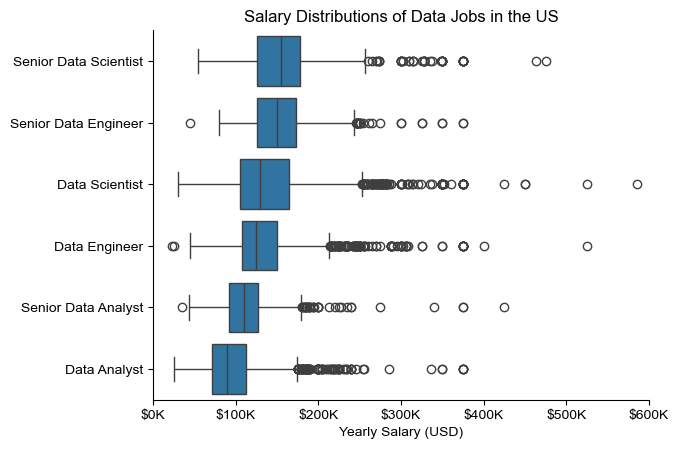

In [9]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()